## Versión F – Análisis de Ventas de Videojuegos en 2024

### Fundamentos de Data Science
Análisis de Ventas de Videojuegos en 2024

### Requisitos:

Tu tarea es limpiar y explorar un dataset que contiene información sobre las ventas de videojuegos en el año 2024. Este análisis es crucial para entender las tendencias de mercado y los factores que influyen en las ventas de videojuegos.

### Limpieza de datos con Python:
* Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.
* Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
* Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Action’, ‘action’, ‘ACTION’).
* Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.
* Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un videojuego con ventas negativas).
### Exploración de datos con Python:
* Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
* Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
### Análisis adicional:
* Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.
* Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.
* Análisis de correlación: Identifica y analiza las correlaciones más fuertes entre las variables del dataset.
* Predicción de ventas: Utiliza un modelo de regresión simple para predecir las ventas futuras basadas en los datos disponibles.

### Importamos las librerias necesarias

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  # Asegúrate de importar esta línea
from sklearn.metrics import mean_squared_error, r2_score

### Carga Dataset y primeras impresiones

In [2]:
df = pd.read_csv('vgchartz-2024.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [3]:
df.describe()


,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


In [4]:
df.isna().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

In [5]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
critic_score,6678,57338,89.57
jp_sales,6726,57290,89.49
na_sales,12637,51379,80.26
pal_sales,12824,51192,79.97
other_sales,15128,48888,76.37
last_update,17879,46137,72.07
total_sales,18922,45094,70.44
release_date,56965,7051,11.01
developer,63999,17,0.03
img,64016,0,0.00


### Limpieza de datos con Python

Eliminaremos las columna img porque no aporta nada relevante, tambien release date y las update porque no se me ocurre que hacer con ellos

In [6]:
df.drop(columns=['img', 'release_date', 'last_update'], inplace=True)


Asegúrate de que cada registro en el dataset sea único.

In [7]:
print(df['developer'].unique())
print('---------------------------')
print(df['genre'].unique())
print('---------------------------')
print(df['publisher'].unique())

['Rockstar North' 'Treyarch' 'Infinity Ward' ... 'Different Tales'
 '4D Door Games' 'InvertMouse']
---------------------------
['Action' 'Shooter' 'Action-Adventure' 'Sports' 'Role-Playing'
 'Simulation' 'Racing' 'Music' 'Misc' 'Fighting' 'Platform' 'Adventure'
 'Strategy' 'Puzzle' 'MMO' 'Sandbox' 'Party' 'Education' 'Board Game'
 'Visual Novel']
---------------------------
['Rockstar Games' 'Activision' 'EA Sports' ...
 "Mind's Eclipse Interactive" 'Walkabout' 'InvertMouse']


In [8]:
print("Top 10 developers by frequency:")
print(df['developer'].value_counts().head(10))
print('---------------------------')

print("Top 10 genres by frequency:")
print(df['genre'].value_counts().head(10))
print('---------------------------')

print("Top 10 publishers by frequency:")
print(df['publisher'].value_counts().head(10))


Top 10 developers by frequency:
developer
Unknown            4435
Konami              976
Sega                915
Capcom              870
Namco               489
Square Enix         425
SNK Corporation     408
EA Canada           396
Hudson Soft         394
Ubisoft             377
Name: count, dtype: int64
---------------------------
Top 10 genres by frequency:
genre
Misc            9304
Action          8557
Adventure       6260
Role-Playing    5721
Sports          5586
Shooter         5410
Platform        4001
Strategy        3685
Puzzle          3521
Racing          3425
Name: count, dtype: int64
---------------------------
Top 10 publishers by frequency:
publisher
Unknown                        8842
Sega                           2207
Ubisoft                        1663
Electronic Arts                1619
Activision                     1582
Konami                         1544
Nintendo                       1476
Sony Computer Entertainment    1372
Microsoft                      1272


Crear una suma para Corregir las ventas totales

Con esto vamos a rellenar todos los total_sales posibles

In [9]:
df_numeric_cols1 = df[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']]

In [10]:
df['total_sales'] = df_numeric_cols1.sum(axis=1)

Eliminamos las filas que no pueden ser rellenadas porque los NAN son muchos

In [12]:
df_cleaned = df.dropna(subset=['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales'])

In [13]:
df = df_cleaned

In [14]:
print(df.shape)
df.head(20)

(2222, 11)


,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.33,6.37,0.99,9.85,3.12
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.87,9.06,0.06,5.33,1.42
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.08,6.18,0.41,6.05,2.44
5,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33
6,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,3.73,1.14
7,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26
8,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20
9,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28


Vamos a usar regresion para entrenar un modelo capaz de imputar datos faltantes en critic

In [15]:
# critic_score	total_sales	na_sales	jp_sales	pal_sales	other_sales

variables = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']

# Crear un modelo de regresión para predecir los valores faltantes
model = LinearRegression()

# Seleccionar las filas sin valores nulos en 'critic_score' y las variables
train_data = df.dropna(subset=['critic_score'] + variables)

X_train = train_data[variables]
y_train = train_data['critic_score']

# Entrenar el modelo
model.fit(X_train, y_train)



LinearRegression()

In [16]:
# Verificar si 'critic_score' existe en el DataFrame
if 'critic_score' in df.columns:
    # Predecir los valores faltantes de 'critic_score'
    missing_data = df[df['critic_score'].isnull()]  # Filtrar filas donde 'critic_score' es NaN
    X_missing = missing_data[variables]  # Usar las mismas variables de entrada que en el entrenamiento

    # Predecir 'critic_score' solo si hay datos en X_missing
    if not X_missing.empty:
        df.loc[df['critic_score'].isnull(), 'critic_score'] = model.predict(X_missing)
else:
    print("La columna 'critic_score' no existe en el DataFrame.")


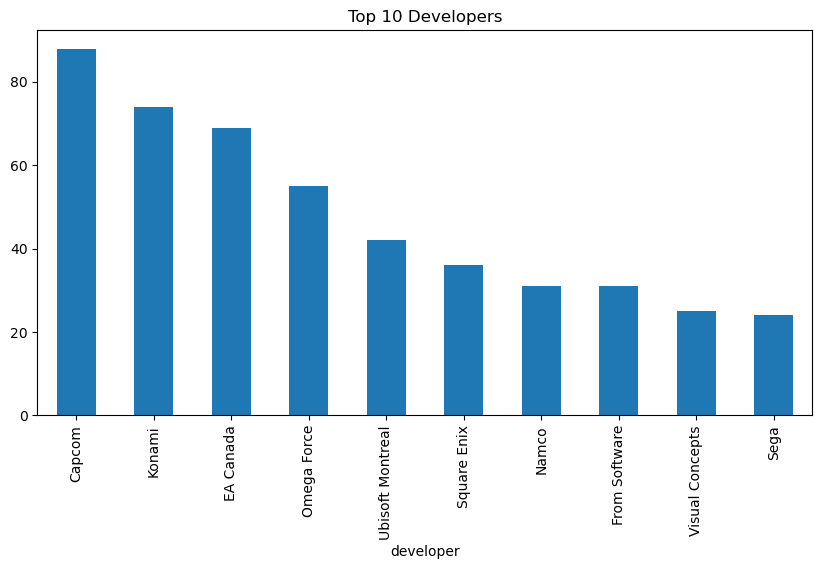

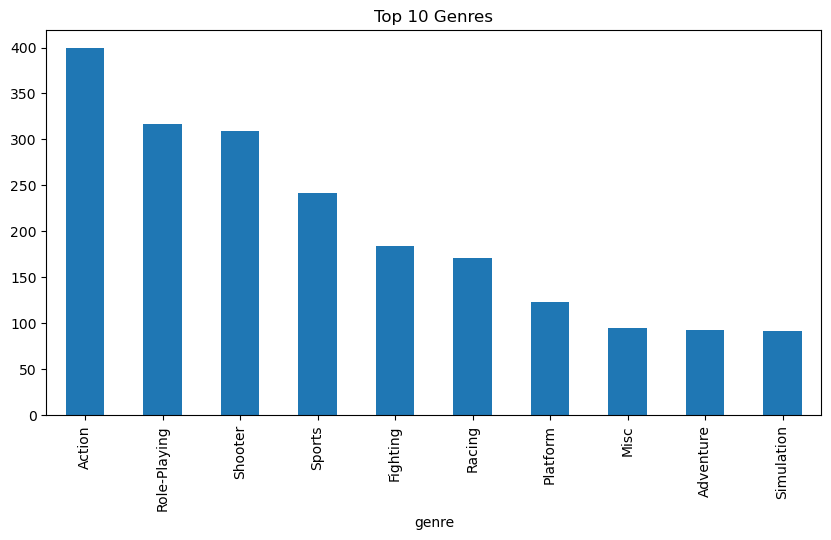

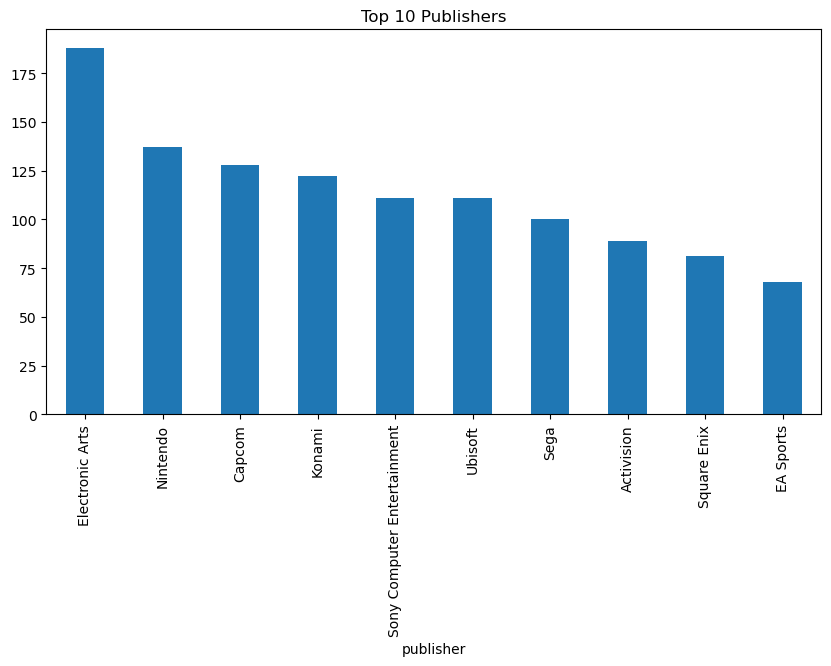

In [17]:
# Gráfico de barras para los desarrolladores más comunes
df['developer'].value_counts().head(10).plot(kind='bar', title="Top 10 Developers", figsize=(10,5))
plt.show()

# Gráfico de barras para los géneros más comunes
df['genre'].value_counts().head(10).plot(kind='bar', title="Top 10 Genres", figsize=(10,5))
plt.show()

# Gráfico de barras para los publishers más comunes
df['publisher'].value_counts().head(10).plot(kind='bar', title="Top 10 Publishers", figsize=(10,5))
plt.show()


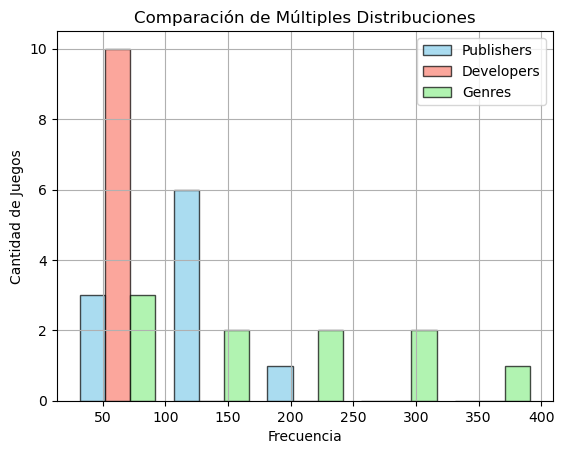

In [18]:
publishers = df['publisher'].value_counts().head(10).values
developers = df['developer'].value_counts().head(10).values
genres = df['genre'].value_counts().head(10).values

# Crear el histograma de múltiples distribuciones
plt.hist([publishers, developers, genres], 
         bins=5, 
         color=['skyblue', 'salmon', 'lightgreen'], 
         edgecolor='black', 
         alpha=0.7, 
         label=['Publishers', 'Developers', 'Genres'])

# Agregar títulos y etiquetas
plt.title("Comparación de Múltiples Distribuciones")
plt.xlabel("Frecuencia")
plt.ylabel("Cantidad de Juegos")
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

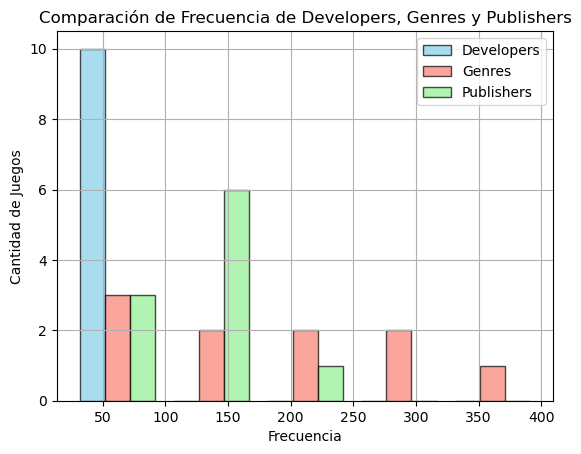

In [19]:
# Datos para los 10 más comunes en cada categoría
developers = df['developer'].value_counts().head(10)
genres = df['genre'].value_counts().head(10)
publishers = df['publisher'].value_counts().head(10)

# Crear el histograma de múltiples distribuciones
plt.hist([developers.values, genres.values, publishers.values], 
         bins=5, 
         color=['skyblue', 'salmon', 'lightgreen'], 
         edgecolor='black', 
         alpha=0.7, 
         label=['Developers', 'Genres', 'Publishers'])

# Agregar títulos y etiquetas
plt.title("Comparación de Frecuencia de Developers, Genres y Publishers")
plt.xlabel("Frecuencia")
plt.ylabel("Cantidad de Juegos")
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

Agrupamos para ver por genero y consola

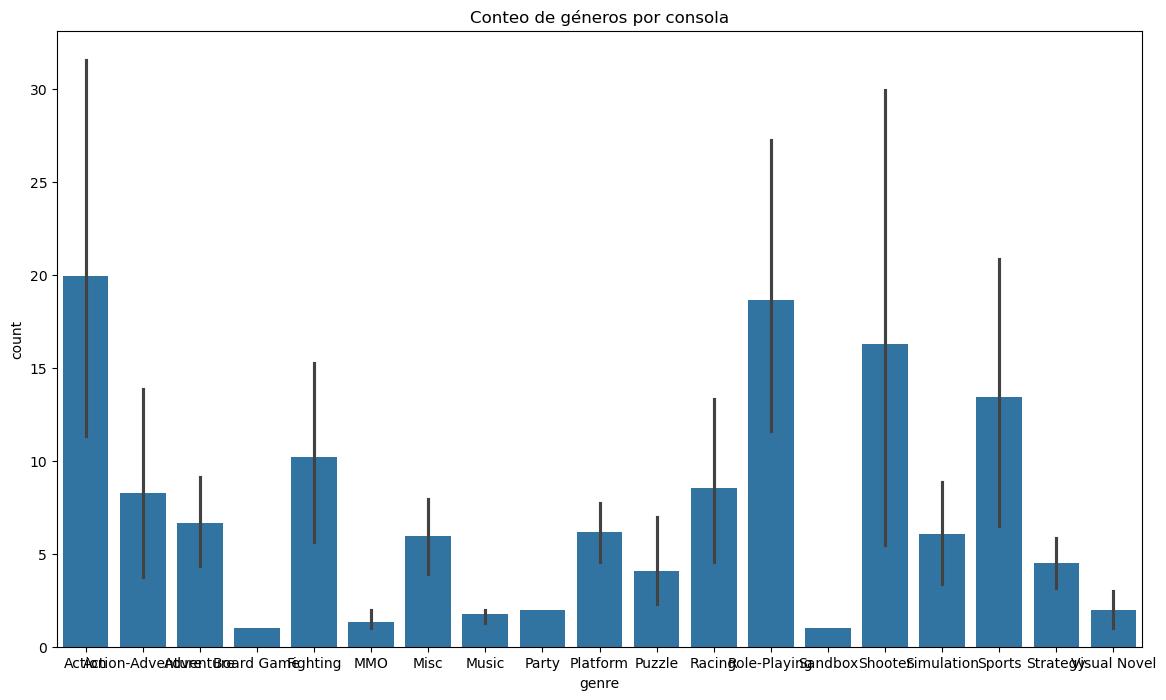

In [20]:
df_group_genre_console = df.groupby(['genre', 'console']).size().reset_index(name='count')
df_group_genre_console

plt.figure(figsize=(14, 8))
sns.barplot(x='genre', y='count', data=df_group_genre_console)
plt.title('Conteo de géneros por consola')
plt.show()

In [21]:
df_group_publisher_sales = df.groupby('publisher').agg({'total_sales': 'sum'}).reset_index()
df_group_publisher_sales.head()

,publisher,total_sales
0,2K Games,34.00
1,2K Sports,43.57
2,505 Games,4.37
3,5pb,0.06
4,989 Studios,5.00


Calculo de correlacion

In [22]:
# Calcular la correlación entre las columnas numericas para ver si existe relacion
# Obs. Usamos .dropna() para obviar los valores nulos

correlation_matrix = df[['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']].dropna().corr()
correlation_matrix

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
critic_score,1.000000,0.406143,0.393224,0.162456,0.339124,0.336586
total_sales,0.406143,1.000000,0.911836,0.208922,0.922683,0.880057
na_sales,0.393224,0.911836,1.000000,0.065052,0.709082,0.703045
jp_sales,0.162456,0.208922,0.065052,1.000000,0.139806,0.162758
pal_sales,0.339124,0.922683,0.709082,0.139806,1.000000,0.853175
other_sales,0.336586,0.880057,0.703045,0.162758,0.853175,1.000000


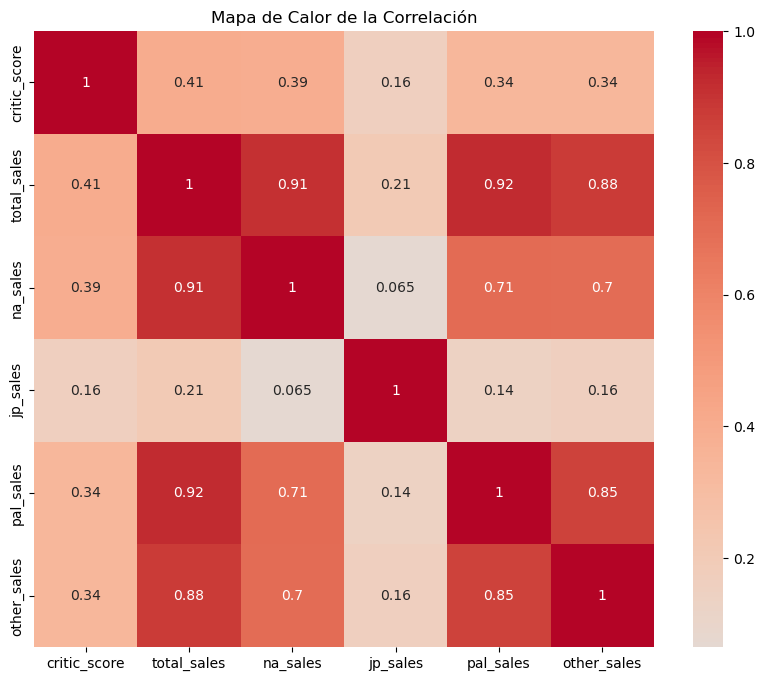

In [23]:
# Creacion de un mapa de calor para la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación")
plt.show()

### Agrupar para sacar conclusiones

Agrupamos por consola para ver conocer quien vende mas

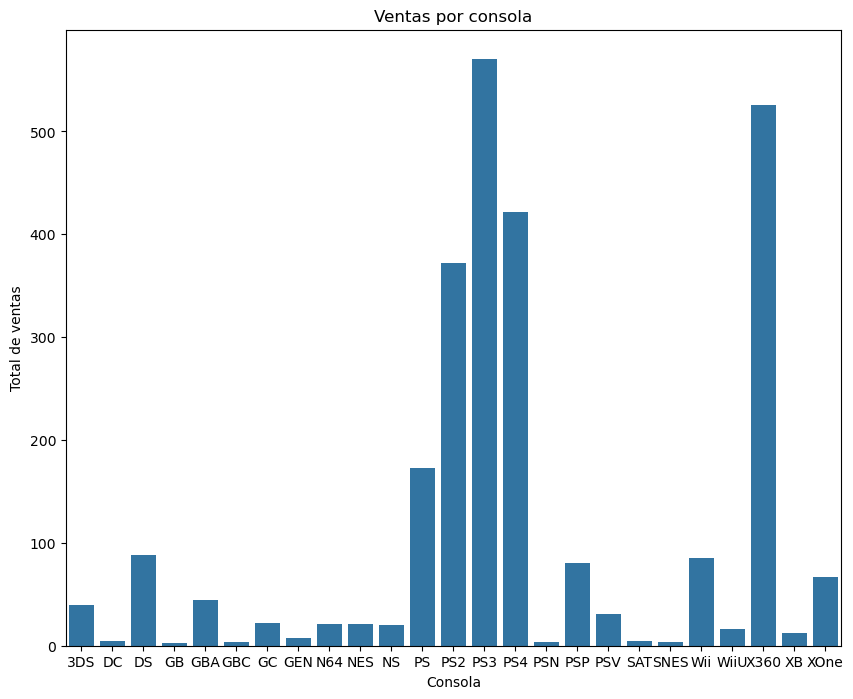

In [30]:
ventas_por_consola = df.groupby('console')['total_sales'].sum()
plt.figure(figsize=(10, 8))
sns.barplot(x=ventas_por_consola.index, y=ventas_por_consola.values)
plt.title('Ventas por consola')
plt.xlabel('Consola')
plt.ylabel('Total de ventas')
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2222 entries, 0 to 15044
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2222 non-null   object 
 1   console       2222 non-null   object 
 2   genre         2222 non-null   object 
 3   publisher     2222 non-null   object 
 4   developer     2222 non-null   object 
 5   critic_score  2222 non-null   float64
 6   total_sales   2222 non-null   float64
 7   na_sales      2222 non-null   float64
 8   jp_sales      2222 non-null   float64
 9   pal_sales     2222 non-null   float64
 10  other_sales   2222 non-null   float64
dtypes: float64(6), object(5)
memory usage: 208.3+ KB


In [29]:
df.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000
mean,7.475244,1.188497,0.531548,0.106197,0.410266,0.140486
std,0.903353,1.844701,0.913448,0.170021,0.797627,0.273060
min,3.000000,0.020000,0.000000,0.000000,0.000000,0.000000
25%,7.234155,0.280000,0.100000,0.020000,0.040000,0.020000
50%,7.382641,0.580000,0.220000,0.050000,0.140000,0.050000
75%,7.900000,1.260000,0.550000,0.120000,0.420000,0.130000
max,10.591767,20.330000,9.760000,2.130000,9.850000,3.120000


In [35]:
X = df[['critic_score', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']]
y = df['total_sales']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Opcional: Mostrar coeficientes del modelo
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 6.219784533995668e-31
R^2 Score: 1.0
               Coefficient
critic_score  3.267516e-16
na_sales      1.000000e+00
jp_sales      1.000000e+00
pal_sales     1.000000e+00
other_sales   1.000000e+00
